<a href="https://colab.research.google.com/github/AmalKhaled28/Student-Score-Prediction/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Load dataset

In [2]:
#Load data
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Basic info about the data

In [3]:
df.shape

(6607, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# Check missing values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [8]:
# missing values percent
missing_percent = (df.isnull().sum()[df.isnull().sum() > 0] / len(df)) * 100
print(missing_percent.round(2).astype(str) + ' %')


Teacher_Quality             1.18 %
Parental_Education_Level    1.36 %
Distance_from_Home          1.01 %
dtype: object


# Missing Value Handling
Fill missing values in categorical columns using the most frequent (mode) value
This prevents data loss and maintains dataset integrity


In [9]:
#Replace missing values with most common category
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

/tmp/ipython-input-1890888682.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
/tmp/ipython-input-1890888682.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [10]:
# Check missing values
df.isnull().sum()[df.isnull().sum() > 0]

,0


# Visualization - Numeric Features

# Numeric Features

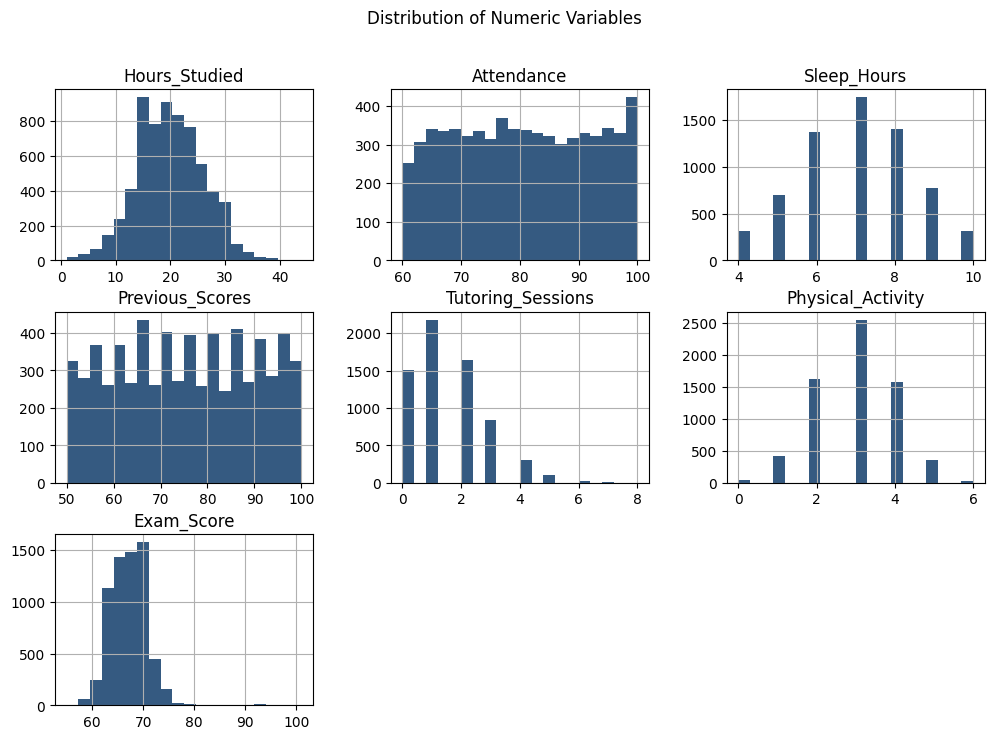

In [11]:
# The histogram shows the distribution of values in each numerical column.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12, 8), bins=20, color='#355a81')
plt.suptitle('Distribution of Numeric Variables')
plt.show()

/tmp/ipython-input-2331067259.py:5: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df[numeric_cols], palette=tetradic_colors)


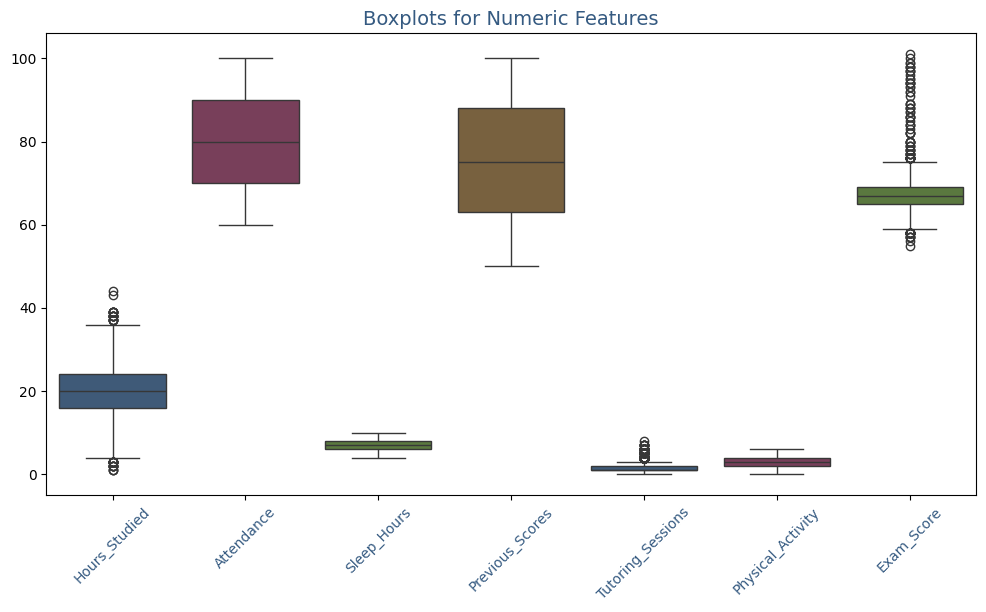

In [12]:
# Boxplots to detect outliers in numerical features
tetradic_colors = ['#355a81', '#81355a', '#5a8135', '#816335']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], palette=tetradic_colors)
plt.title('Boxplots for Numeric Features', color='#355a81', fontsize=14)
plt.xticks(rotation=45, color='#355a81', fontsize=10)
plt.show()

In [13]:
# Function to show only outlier values for each column
def show_outlier_values(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]

        print(f"\nColumn: {col}")
        print(f"Number of outliers: {outliers.shape[0]}")
        print("Outlier values:")
        print(outliers.values)  # show outlier values
        print("-"*50)

# Columns to check
columns_to_check = ['Exam_Score', 'Hours_Studied', 'Tutoring_Sessions']

# Show only outlier values
show_outlier_values(df, columns_to_check)



Column: Exam_Score
Number of outliers: 104
Outlier values:
[100  76  79  78  89  86  97  83  84  80  58  94  94  97  80  55  89  92
  76  58  82  76  77 101  88  77  58  89  80  79  76  84  76  76  91  76
  86  99  88  58  78  77  58  87  87  57  88  58  82  94  86  76  76  58
  86  58  96  58  76  57  99  58  76  78  58  82  84  58  76  98  78  80
  95  85  94  58  58  93  93  58  58  82  76  77  58  92  76  79  58  56
  58  57  58  57  97  80  58  76  77  98  98  58  95  76]
--------------------------------------------------

Column: Hours_Studied
Number of outliers: 43
Outlier values:
[43  1 38  3  3  3  2 39 39  2  2 37 39 38 38 44  2  3  3 37  2 39 39  3
 37  2  3  3  3  3  1  1 37 38 39 38 38  3 37 39 38  3 37]
--------------------------------------------------

Column: Tutoring_Sessions
Number of outliers: 430
Outlier values:
[4 4 5 4 4 4 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 5 4 4 4 5 4 4 4 4
 4 5 4 4 6 5 4 4 4 6 5 5 4 4 4 4 4 4 5 5 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 5 4
 4 5

In [14]:
# functio to Detect outliers using IQR
def detect_outliers_with_percentage(df, col):
    """
    Detect outliers using the IQR method.
    Display the count and percentage of outliers before and after capping.
    Returns the modified DataFrame.
    """
    total = df.shape[0]
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Before capping
    n_out_before = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    pct_before = (n_out_before / total) * 100

    # Apply capping
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

    # After capping
    n_out_after = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    pct_after = (n_out_after / total) * 100

    # Display results
    print(f"\nColumn: {col}")
    print(f"  Outliers before: {n_out_before} ({pct_before:.2f}%)")
    print(f"  Outliers after : {n_out_after} ({pct_after:.2f}%)")

    return df

In [15]:
# Apply to numeric features
numeric_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity',
    'Exam_Score'
]

# Work on a clean copy
df_clean = df.copy()

for col in numeric_features:
    if col in df_clean.columns:
        df_clean = detect_outliers_with_percentage(df_clean, col)
    else:
        print(f"Warning: Column {col} not in DataFrame.")


Column: Hours_Studied
  Outliers before: 43 (0.65%)
  Outliers after : 0 (0.00%)

Column: Attendance
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Sleep_Hours
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Previous_Scores
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Tutoring_Sessions
  Outliers before: 430 (6.51%)
  Outliers after : 0 (0.00%)

Column: Physical_Activity
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Exam_Score
  Outliers before: 104 (1.57%)
  Outliers after : 0 (0.00%)


/tmp/ipython-input-2748045270.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_clean[numeric_features], palette=tetradic_colors)


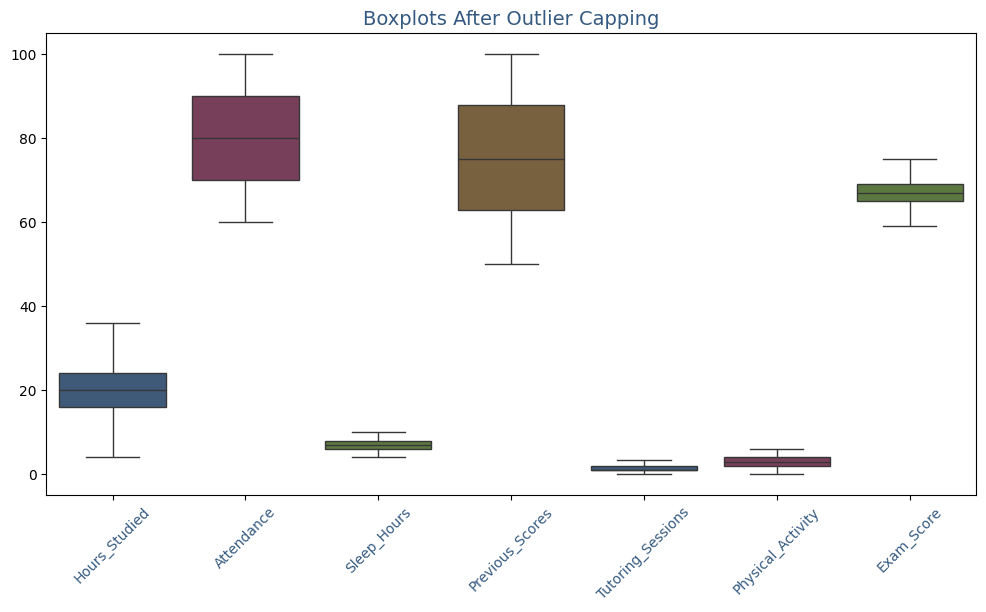

In [16]:
#Boxplot to confirm after capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_features], palette=tetradic_colors)
plt.title('Boxplots After Outlier Capping', color='#355a81', fontsize=14)
plt.xticks(rotation=45, color='#355a81', fontsize=10)
plt.show()

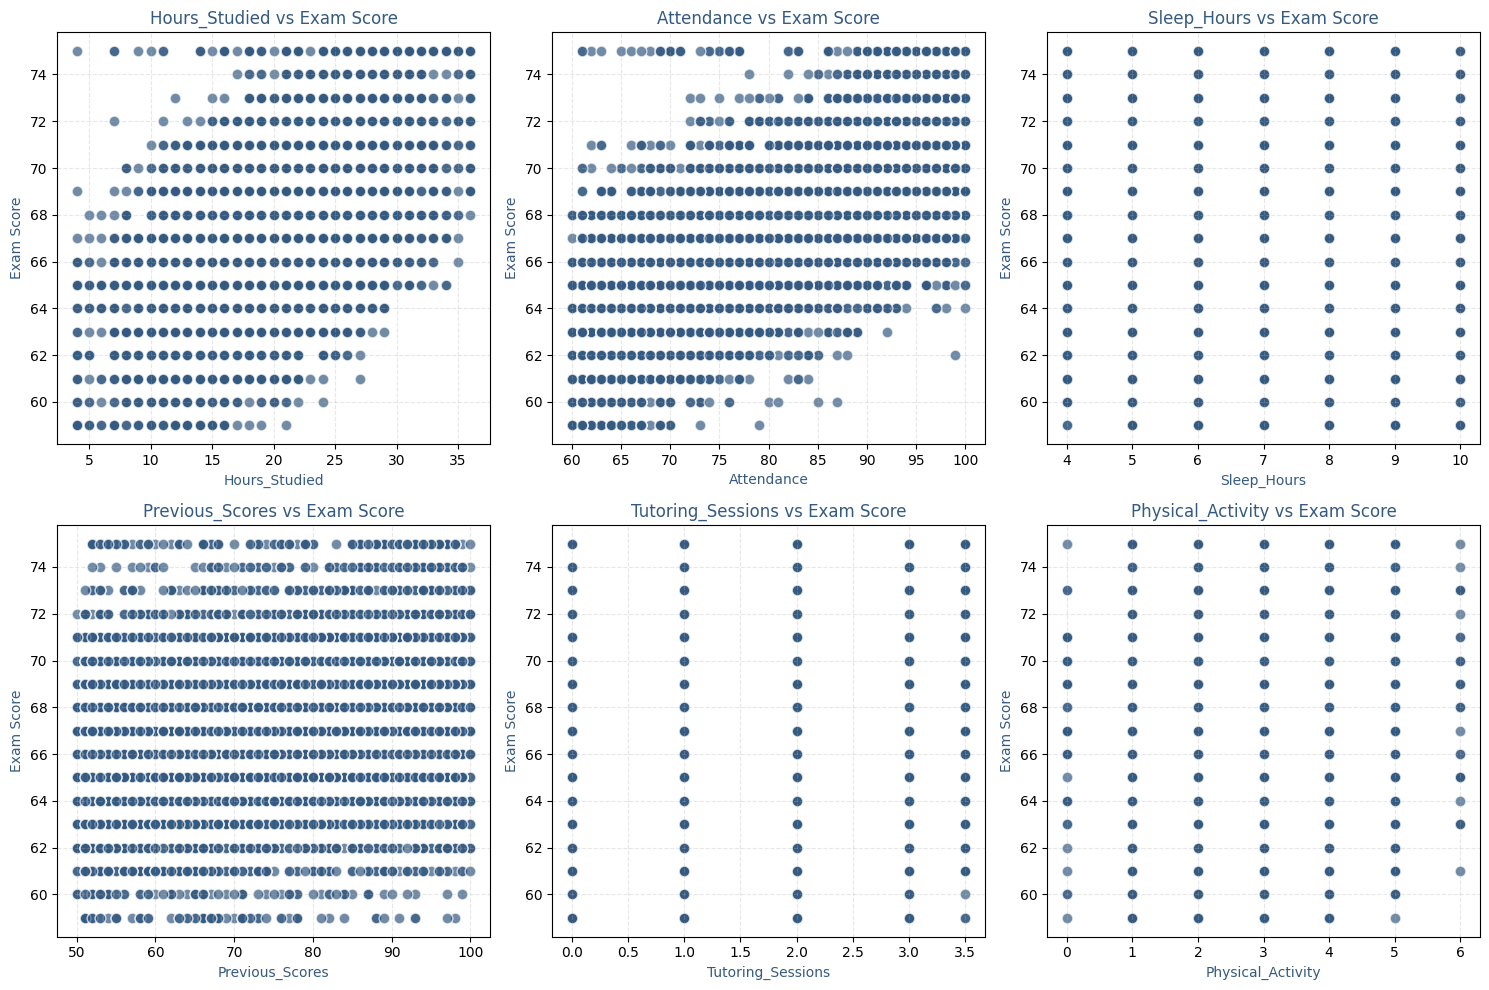

In [17]:
# Scatter plots: numeric features vs Exam_Score
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features[:-1], 1):  # exclude Exam_Score
    plt.subplot(2, 3, i)
    plt.scatter(df_clean[col], df_clean['Exam_Score'],
                color='#355a81', alpha=0.7, edgecolors='white', s=60)
    plt.title(f'{col} vs Exam Score', color='#355a81', fontsize=12)
    plt.xlabel(col, color='#355a81')
    plt.ylabel('Exam Score', color='#355a81')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

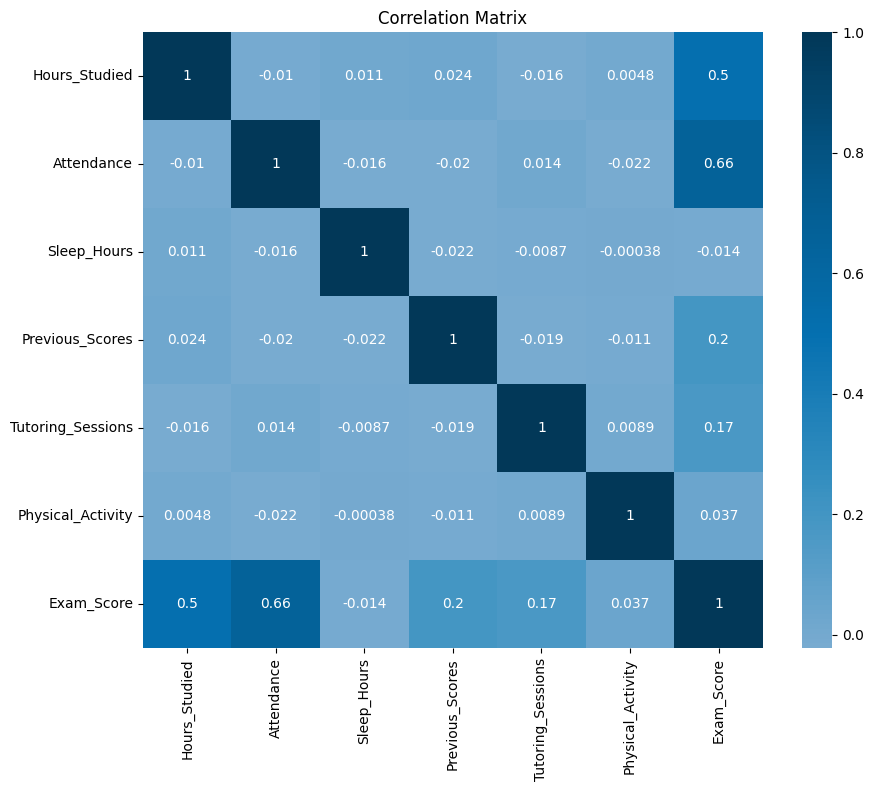

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', center=0)
plt.title('Correlation Matrix')
plt.show()

# Visualization - Categorical Features
 Count plots for categorical variables

/tmp/ipython-input-4166911002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette=tetradic_colors)
/tmp/ipython-input-4166911002.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=col, data=df_clean, palette=tetradic_colors)
/tmp/ipython-input-4166911002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette=tetradic_colors)
/tmp/ipython-input-4166911002.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=col, data=df_clean, palette=tetradic_colors)
/tmp/ipython-input-4166911002.py:12: FutureWar

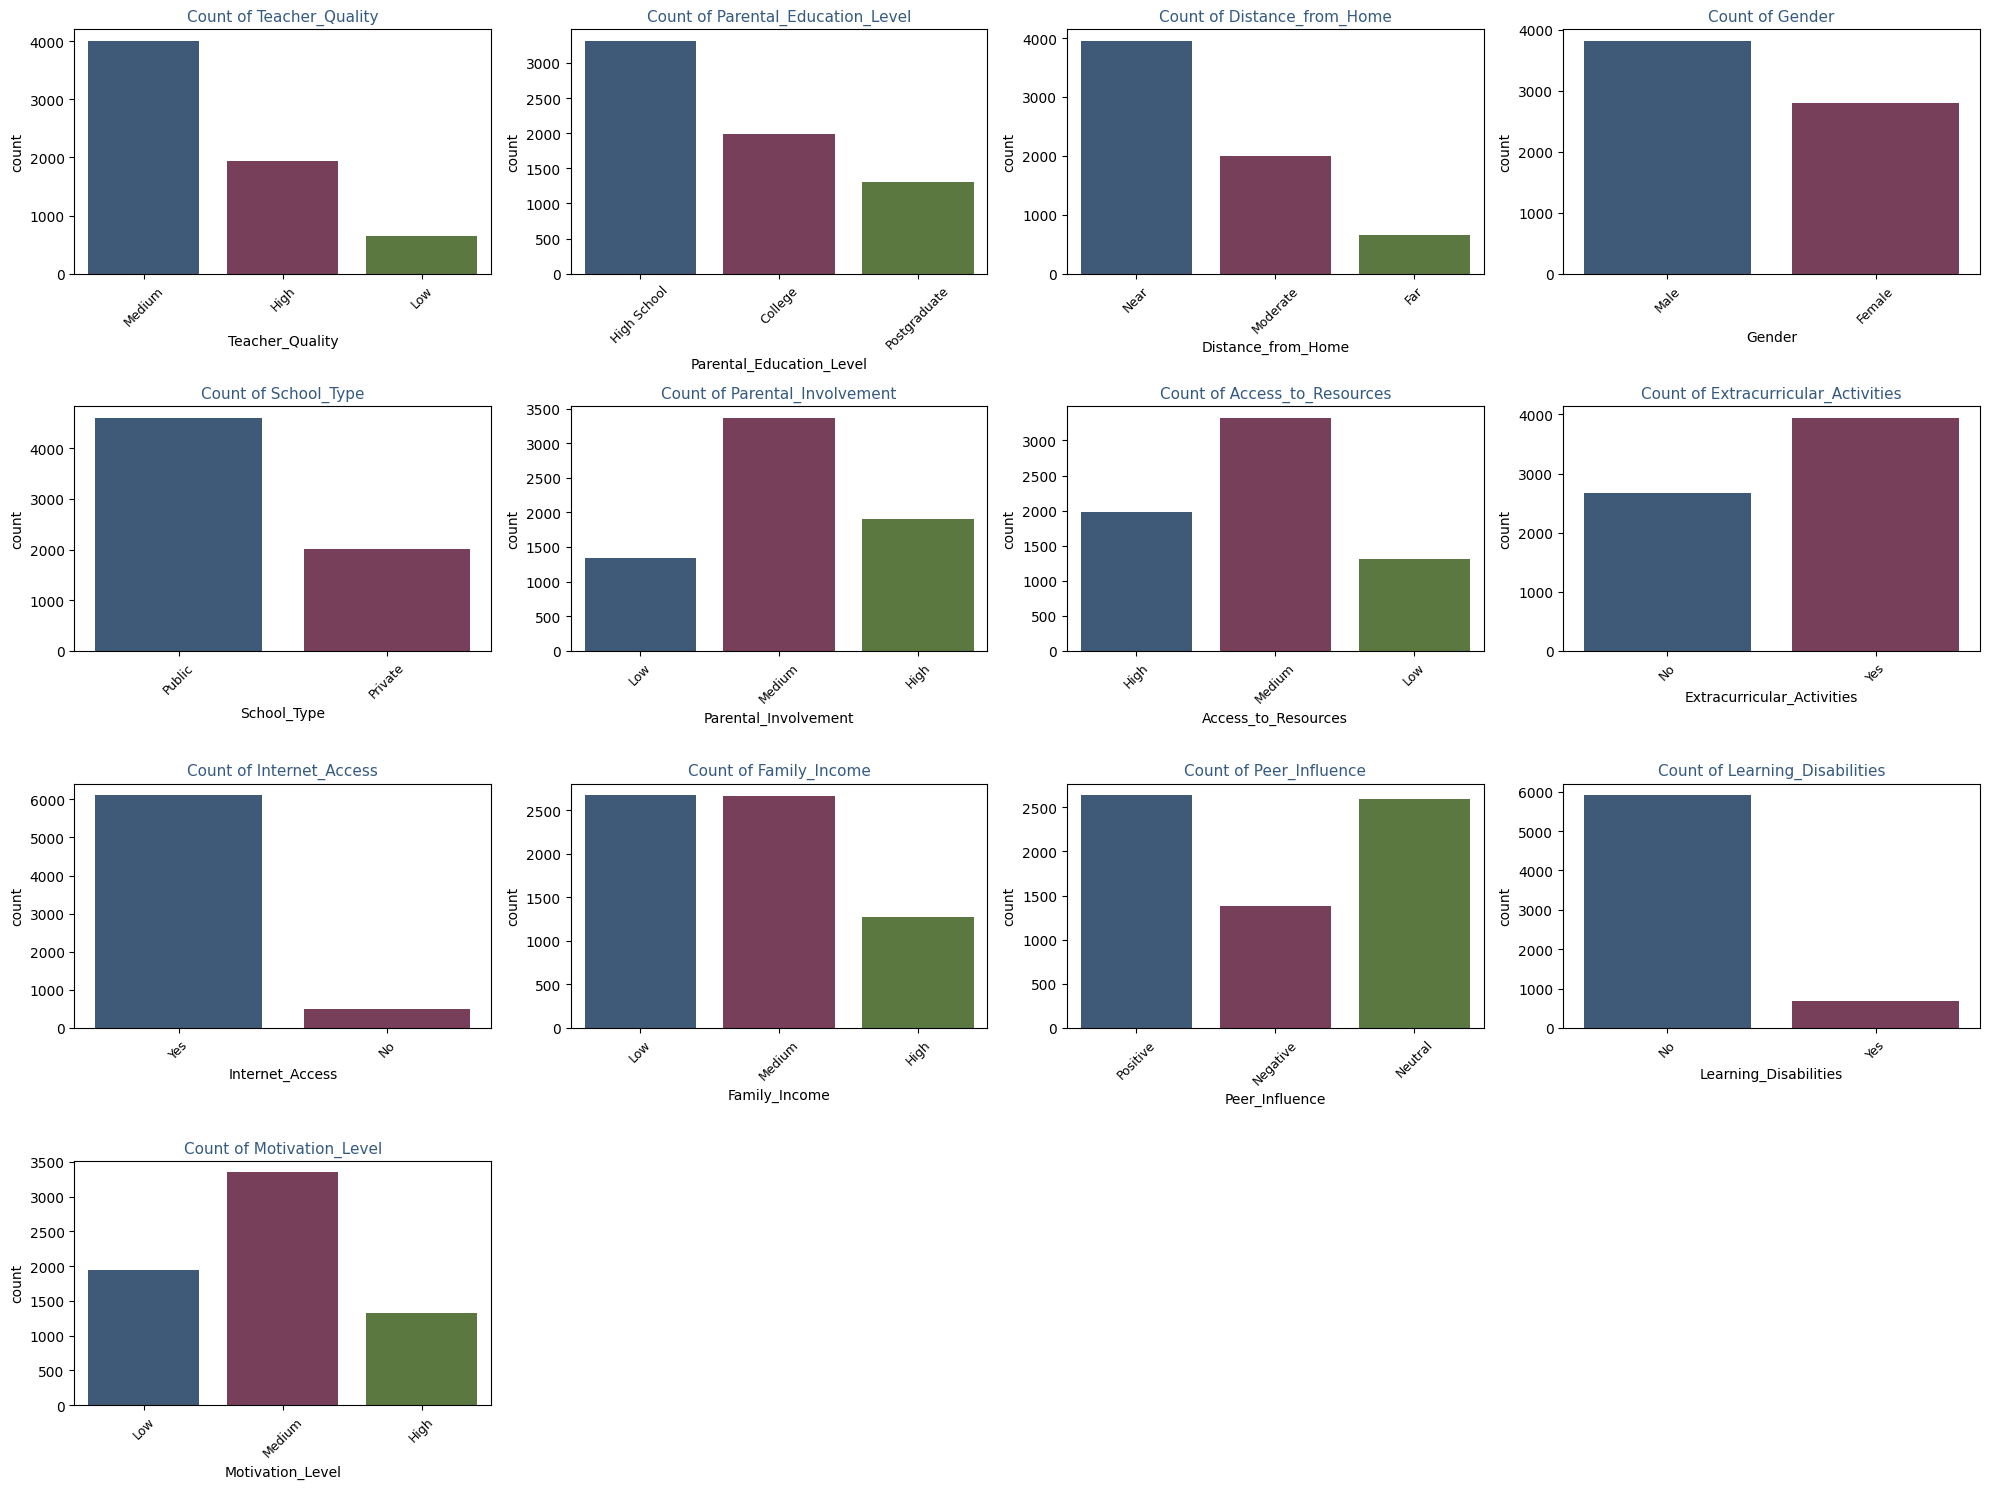

In [19]:
categorical_cols = [
    'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home',
    'Gender', 'School_Type', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Internet_Access', 'Family_Income',
    'Peer_Influence', 'Learning_Disabilities', 'Motivation_Level'
]


plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, data=df_clean, palette=tetradic_colors)
    plt.xticks(rotation=45, fontsize=9)
    plt.title(f'Count of {col}', color='#355a81', fontsize=11)
plt.tight_layout()
plt.show()

In [20]:
# Encoding Categorical Variables
# Use LabelEncoder for ordinal categories
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

#Define Ordinal Encoding
ordinal_cols = ['Parental_Education_Level', 'Motivation_Level', 'Teacher_Quality']
le = LabelEncoder()
for col in ordinal_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [21]:
# Use OneHotEncoder for nominal categories
# Define nominal categories
nominal_cols = ['Gender', 'School_Type', 'Distance_from_Home',
                'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                'Internet_Access', 'Family_Income', 'Peer_Influence', 'Learning_Disabilities']

# Keep only existing columns to avoid KeyError
nominal_cols_existing = [col for col in nominal_cols if col in df_encoded.columns]

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols_existing, drop_first=True)

In [22]:
df_encoded

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Parental_Education_Level,Exam_Score,...,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes
0,23.0,84.0,7.0,73.0,1,0.0,2,3.0,1,67.0,...,False,False,False,False,True,True,False,False,True,False
1,19.0,64.0,8.0,59.0,1,2.0,2,4.0,0,61.0,...,False,False,True,False,True,False,True,False,False,False
2,24.0,98.0,7.0,91.0,2,2.0,2,4.0,2,74.0,...,True,False,True,True,True,False,True,True,False,False
3,29.0,89.0,8.0,98.0,2,1.0,2,4.0,1,71.0,...,False,False,True,True,True,False,True,False,False,False
4,19.0,92.0,6.0,65.0,2,3.0,0,4.0,0,70.0,...,True,False,True,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,7.0,76.0,2,1.0,2,2.0,1,68.0,...,False,False,True,False,True,False,False,False,True,False
6603,23.0,76.0,8.0,81.0,2,3.0,0,2.0,1,69.0,...,False,False,True,False,True,True,False,False,True,False
6604,20.0,90.0,6.0,65.0,1,3.0,2,2.0,2,68.0,...,True,True,False,True,True,True,False,False,False,False
6605,10.0,86.0,6.0,91.0,0,2.0,2,3.0,1,68.0,...,False,False,False,True,True,True,False,False,True,False


In [23]:
# Convert all boolean columns to 0 and 1
df_encoded = df_encoded.astype(int)
df_encoded

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Parental_Education_Level,Exam_Score,...,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes
0,23,84,7,73,1,0,2,3,1,67,...,0,0,0,0,1,1,0,0,1,0
1,19,64,8,59,1,2,2,4,0,61,...,0,0,1,0,1,0,1,0,0,0
2,24,98,7,91,2,2,2,4,2,74,...,1,0,1,1,1,0,1,1,0,0
3,29,89,8,98,2,1,2,4,1,71,...,0,0,1,1,1,0,1,0,0,0
4,19,92,6,65,2,3,0,4,0,70,...,1,0,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,2,1,2,2,1,68,...,0,0,1,0,1,0,0,0,1,0
6603,23,76,8,81,2,3,0,2,1,69,...,0,0,1,0,1,1,0,0,1,0
6604,20,90,6,65,1,3,2,2,2,68,...,1,1,0,1,1,1,0,0,0,0
6605,10,86,6,91,0,2,2,3,1,68,...,0,0,0,1,1,1,0,0,1,0


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6607 non-null   int64
 1   Attendance                      6607 non-null   int64
 2   Sleep_Hours                     6607 non-null   int64
 3   Previous_Scores                 6607 non-null   int64
 4   Motivation_Level                6607 non-null   int64
 5   Tutoring_Sessions               6607 non-null   int64
 6   Teacher_Quality                 6607 non-null   int64
 7   Physical_Activity               6607 non-null   int64
 8   Parental_Education_Level        6607 non-null   int64
 9   Exam_Score                      6607 non-null   int64
 10  Gender_Male                     6607 non-null   int64
 11  School_Type_Public              6607 non-null   int64
 12  Distance_from_Home_Moderate     6607 non-null   int64
 13  Dis

/tmp/ipython-input-537424299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='viridis')


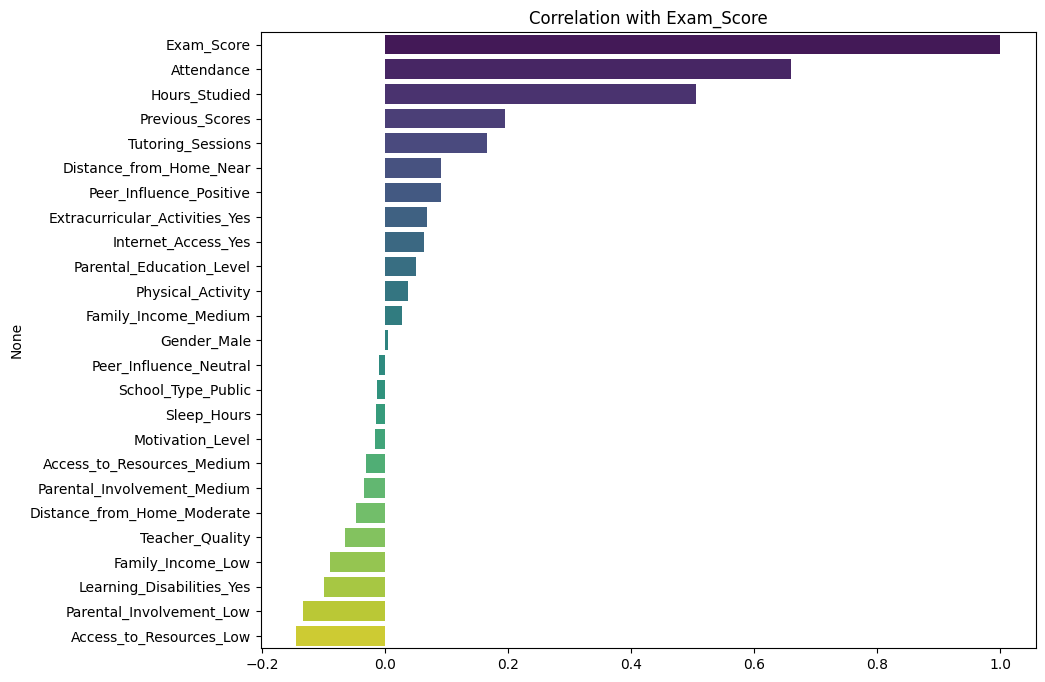

In [25]:
corr_target = df_encoded.corr()['Exam_Score'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='viridis')
plt.title("Correlation with Exam_Score")
plt.show()

# Insight: Hours_Studied and Attendance show clear positive trend

In [26]:
# Target variable
y = df_encoded['Exam_Score']

# Features
X = df_encoded.drop(columns=['Exam_Score'])

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Scale numerical features (StandardScaler for normalization)
num_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'
]
scaler = StandardScaler()  # Initialize scaler
X_train[num_features] = scaler.fit_transform(X_train[num_features])  # Fit and transform train
X_test[num_features] = scaler.transform(X_test[num_features])  # Transform test

# Linear Regression Model

In [28]:
# Train Linear Regression Model (Full Features)
lr = LinearRegression()  # Initialize model
lr.fit(X_train, y_train)  # Fit on training data


LinearRegression()

In [29]:
# Make Predictions
y_pred = lr.predict(X_test)  # Predict on test set

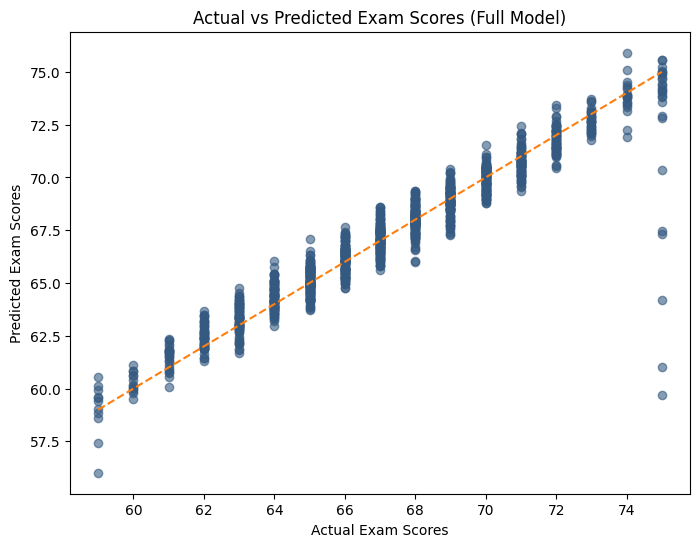

In [30]:
# Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#355a81', alpha=0.6)  # Scatter of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#ff7f0e', linestyle='--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Full Model)')
plt.show()  # Display


In [31]:
# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)          # Mean Squared Error
rmse = np.sqrt(mse)                                # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)         # Mean Absolute Error
r2 = r2_score(y_test, y_pred)                     # R-squared
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
print(f"The model explains {r2*100:.2f}% of the variance in scores.")

MSE: 0.9602711714731063
RMSE: 0.9799342689553755
R² Score: 0.9148175765886648
The model explains 91.48% of the variance in scores.


# Polynomial Regression Model

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)

# Make Predictions
y_pred_poly = poly_reg.predict(X_test_poly)

In [33]:
mse_poly  = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly  = mean_absolute_error(y_test, y_pred_poly)
r2_poly   = r2_score(y_test, y_pred_poly)

print(f"Polynomial MSE : {mse_poly:.4f}")
print(f"Polynomial RMSE: {rmse_poly:.4f}")
print(f"Polynomial MAE : {mae_poly:.4f}")
print(f"Polynomial R²  : {r2_poly:.4f}")
print(f"Number of features after Polynomial: {X_train_poly.shape[1]}")

Polynomial MSE : 0.7096
Polynomial RMSE: 0.8424
Polynomial MAE : 0.4072
Polynomial R²  : 0.9371
Number of features after Polynomial: 324


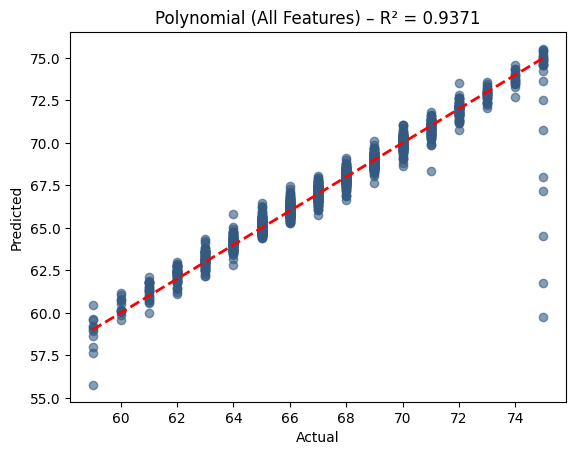

In [34]:
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='#355a81')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Polynomial (All Features) – R² = {r2_poly:.4f}')
plt.show()

# Compare Linear vs Polynomial Regression

In [35]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial (Deg 2)'],
    'MSE': [f"{mse:.4f}", f"{mse_poly:.4f}"],
    'RMSE': [f"{rmse:.4f}", f"{rmse_poly:.4f}"],
    'MAE': [f"{mae:.4f}", f"{mae_poly:.4f}"],
    'R²': [f"{r2:.4f}", f"{r2_poly:.4f}"]
})

print(comparison.to_string(index=False))

             Model    MSE   RMSE    MAE     R²
 Linear Regression 0.9603 0.9799 0.5728 0.9148
Polynomial (Deg 2) 0.7096 0.8424 0.4072 0.9371


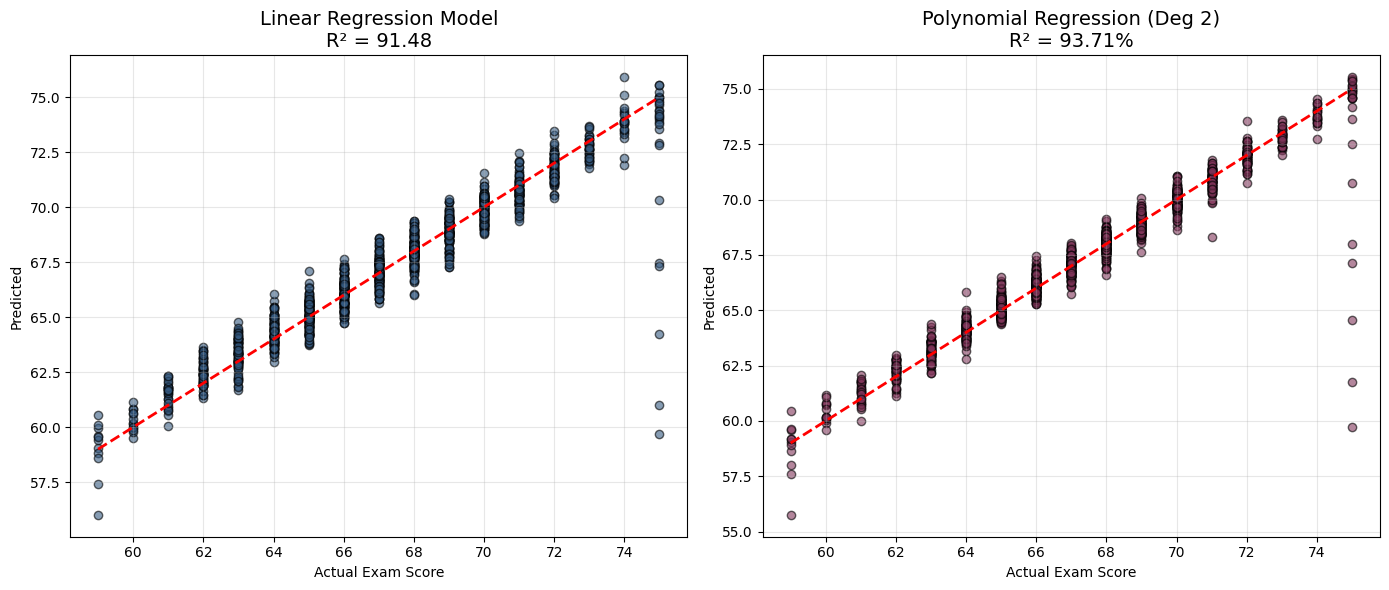

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Linear
ax1.scatter(y_test, y_pred, alpha=0.6, color='#355a81', edgecolor='k')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_title(f'Linear Regression Model\nR² = {r2*100:.2f}', fontsize=14)
ax1.set_xlabel('Actual Exam Score')
ax1.set_ylabel('Predicted')
ax1.grid(True, alpha=0.3)

# Polynomial
ax2.scatter(y_test, y_pred_poly, alpha=0.6, color='#81355a', edgecolor='k')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_title(f'Polynomial Regression (Deg 2)\nR² = {r2_poly*100:.2f}%', fontsize=14)
ax2.set_xlabel('Actual Exam Score')
ax2.set_ylabel('Predicted')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()